# **Project Name**    - Car Price Prediction with Machine Learning



# **Project Summary -**

**Objective:** Develop a machine learning model to predict car prices based on various influencing factors.

**Why Car Price Prediction?** Car prices are influenced by numerous variables, including brand reputation, features, horsepower, and fuel efficiency. Machine learning models can provide accurate price predictions.

**Key Tasks:**

1. **Data Collection:** Gather data on various car attributes and their corresponding prices.
2. **Data Preprocessing:** Clean, transform, and prepare the data for modeling.
3. **Feature Engineering:** Identify the most important features for price prediction.
4. **Model Building:** Create a machine learning model capable of predicting car prices.
5. **Model Evaluation:** Assess the model's accuracy and performance using appropriate metrics.
6. **Deployment:** Make the trained model available for car price predictions.

**Benefits:** By completing this project, we'll gain valuable insights into machine learning, data analysis, and the automotive industry. We'll also have a functional car price prediction model that can be useful for future car pricing decisions.

# **Problem Statement**


**Project Overview:**

In the automotive industry, determining the price of a car involves various factors, such as brand reputation, car features, horsepower, and fuel efficiency. Car price prediction is a crucial application of machine learning. This project is designed to help you learn how to build a model for car price prediction.

**Key Objectives:**

- Explore the factors affecting car prices.
- Create a machine learning model to predict car prices.
- Gain valuable experience in the field of machine learning and automotive pricing.

# ***Let's Begin !***

## ***1. Know The Data***

### Import Libraries

In [21]:
# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import preprocessing libraries
from sklearn.preprocessing import MinMaxScaler,StandardScaler

# Import Model
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
import xgboost as xgb

# Import evaluation metric libraries
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

# Import model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Import tree for visualization
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG,display
from graphviz import Source

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Dataset Loading

In [22]:
# Load Dataset
df = pd.read_csv("https://raw.githubusercontent.com/Apaulgithub/oibsip_task3/main/car%20data.csv")

### Dataset First View

In [23]:
# Dataset First Look
# View top 5 rows of the dataset
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### Dataset Rows & Columns count

In [24]:
# Dataset Rows & Columns count
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  301
Number of columns are:  9


### Dataset Information

In [25]:
# Dataset Info
# Checking information about the dataset using info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


#### Duplicate Values

In [26]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 2


#### Missing Values/Null Values

In [27]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


### What did i know about the dataset?

* The car dataset consists of Cars Name, Price details, No. of Owner etc. of different cars.
* There are 301 rows and 9 columns provided in the data.
* 2 duplicate rows present in the dataset.
* Null values not exist in the dataset.

## ***2. Understanding The Variables***

In [28]:
# Dataset Columns
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [29]:
# Dataset Describe (all columns included)
df.describe(include= 'all').round(2)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
count,301,301.00,301.00,301.00,301.00,301,301,301,301.00
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.63,4.66,7.63,36947.21,NaN,NaN,NaN,0.04
std,NaN,2.89,5.08,8.64,38886.88,NaN,NaN,NaN,0.25
min,NaN,2003.00,0.10,0.32,500.00,NaN,NaN,NaN,0.00
25%,NaN,2012.00,0.90,1.20,15000.00,NaN,NaN,NaN,0.00
50%,NaN,2014.00,3.60,6.40,32000.00,NaN,NaN,NaN,0.00
75%,NaN,2016.00,6.00,9.90,48767.00,NaN,NaN,NaN,0.00


### Check Unique Values for each variable.

In [30]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in Car_Name is 98
No. of unique values in Year is 16
No. of unique values in Selling_Price is 156
No. of unique values in Present_Price is 148
No. of unique values in Driven_kms is 206
No. of unique values in Fuel_Type is 3
No. of unique values in Selling_type is 2
No. of unique values in Transmission is 2
No. of unique values in Owner is 3


## ***3. Data Wrangling***

### Data Wrangling Code

In [31]:
# Adding a 'Current Year' column with a constant value of 2023 to the DataFrame
df['Current Year'] = 2023

# Calculating the age of the vehicles by subtracting the 'Year' column from the 'Current Year'
df['no_year'] = df['Current Year'] - df['Year']

In [32]:
# Removing the 'Current Year' column as it's no longer needed
df.drop(['Current Year'], axis=1, inplace=True)

In [33]:
# New updated DataFrame
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,no_year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [34]:
# Defining dependent variable
dependent_variable = ['Selling_Price']

### What all manipulations have i done and insights i found?

*   Adding a new column as 'no_year' by substracting the 'Year' from the 'Current Year' (which is taken as 2023).
*   Drop the 'Current Year' column from the DataFrame.







## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 : Top 10 Most Selling Car

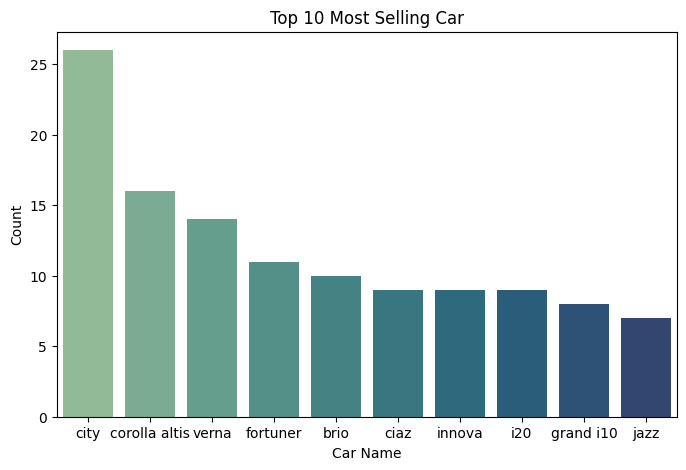

In [35]:
# Chart - 1 Count plot visualization code for top 10 most selling car
# Count the occurrences of each unique car name in the 'Car_Name' column and take the top 10 most selling car
top10 = df['Car_Name'].value_counts()[:10]

# Create a count plot to visualize the top 10 car
plt.figure(figsize=(8, 5))
sns.countplot(x='Car_Name', data=df, order=top10.index, palette='crest')

# Set labels and title for the plot
plt.xlabel('Car Name')
plt.ylabel('Count')
plt.title('Top 10 Most Selling Car')

# Display the plot
plt.show()

##### What is/are the insight(s) found from the chart?

From the above chart, we got to know that 'city' is the top most selling car, followed by corolla altis, verna, fortuner and brio.

#### Chart - 2 : Number of Cars Bought Each Year

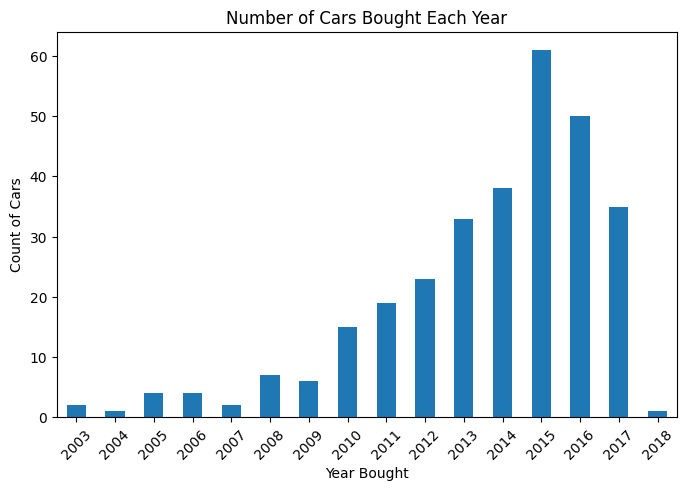

In [36]:
# Chart - 2 Bar plot visualization code for Number of Cars Bought Each Year
# Set the figure size for the plot
plt.figure(figsize=(8, 5))

# Group the data by the 'Year' column and count the number of occurrences for each year
yearly_counts = df.groupby('Year').count()['Car_Name']

# Create a bar plot to visualize the count of cars bought in each year
yearly_counts.plot(kind='bar')

# Rotate the x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Set labels and title for the plot
plt.xlabel('Year Bought')
plt.ylabel('Count of Cars')
plt.title('Number of Cars Bought Each Year')

# Display the plot
plt.show()

##### What is/are the insight(s) found from the chart?

From the above chart, we got to know that 2015 has the highest count of car purchases (popular year for buying cars), followed by 2016 and 2014.

#### Chart - 3 : Distribution of Categorical Variable

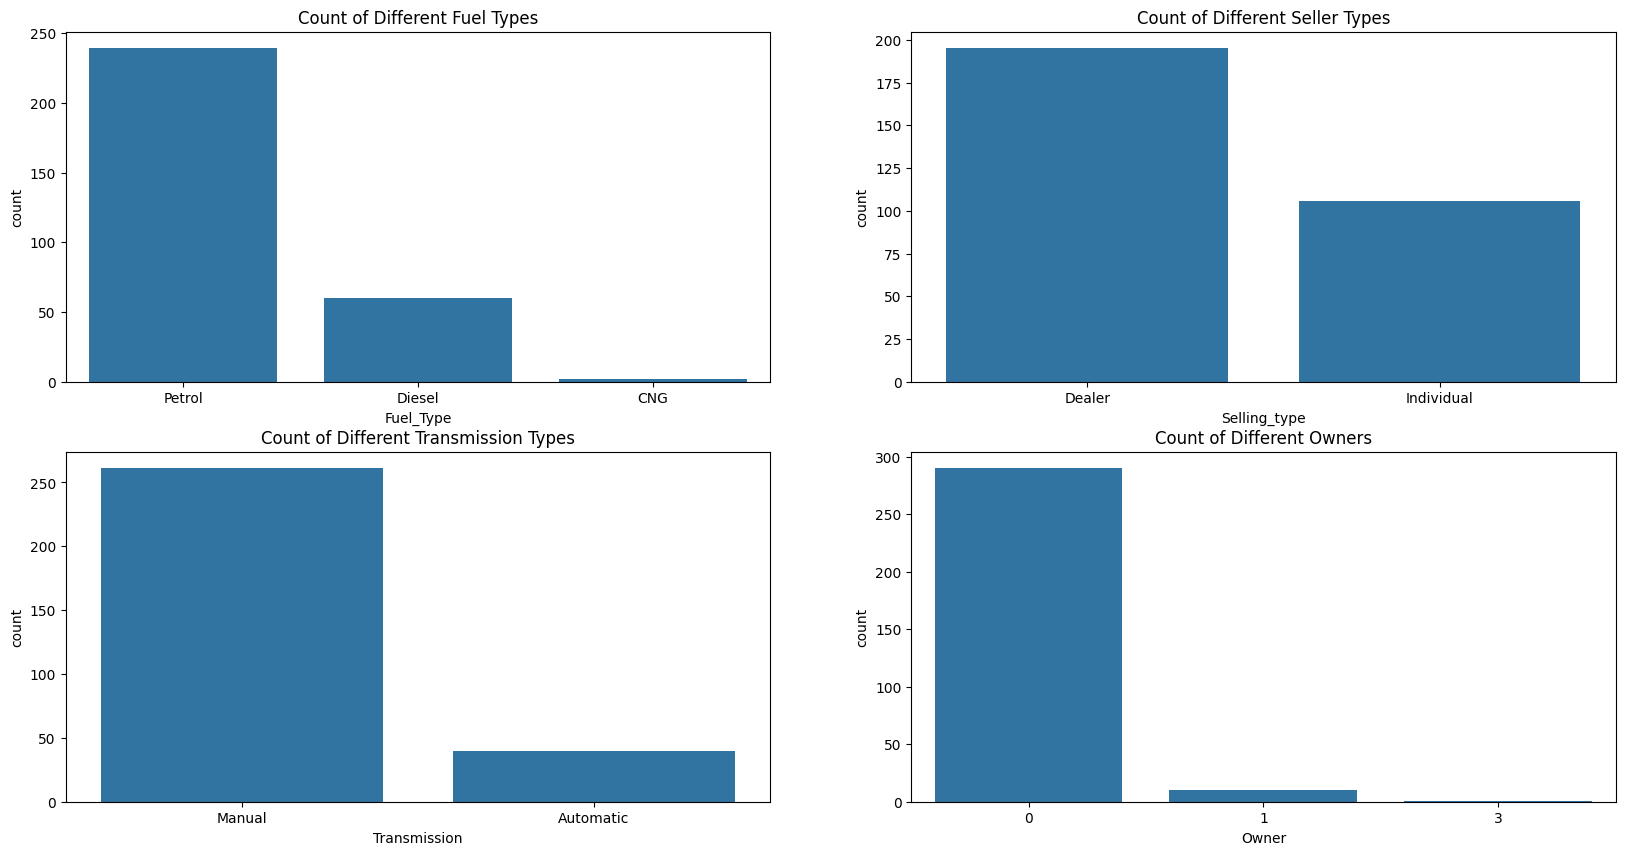

In [37]:
# Chart - 3 Count plot visualization code for Categorical Variable
# Create a 2x2 subplot
plt.figure(figsize=(20,10))

# Subplot 1: Count of different Fuel Types
plt.subplot(2,2,1)
sns.countplot(data=df, x = 'Fuel_Type')
plt.title("Count of Different Fuel Types")

# Subplot 2: Count of different Seller Types
plt.subplot(2,2,2)
sns.countplot(data=df, x = 'Selling_type')
plt.title("Count of Different Seller Types")

# Subplot 3: Count of different Transmission Types
plt.subplot(2,2,3)
sns.countplot(data=df, x = 'Transmission')
plt.title("Count of Different Transmission Types")

# Subplot 4: Count of different Owners
plt.subplot(2,2,4)
sns.countplot(data=df, x = 'Owner')
plt.title("Count of Different Owners")

# Display the plot
plt.show()

##### What is/are the insight(s) found from the chart?

From the above plots we can analyse that:

* The number of cars having their 'Fuel_Type' type as Petrol is greater when compared to the other types namely: Diesel and CNG.
* We can observe that most of the cars are sold through Dealers when compared to the Individual sellers.
* We clearly see that Manual cars are much more in number when compared to Automatic cars.
* Most of the cars are sold by the First Owners and negligible number of cars are sold by the Third or Fourth Owners.

#### Chart - 4 : Categorical Variable vs Target Variable

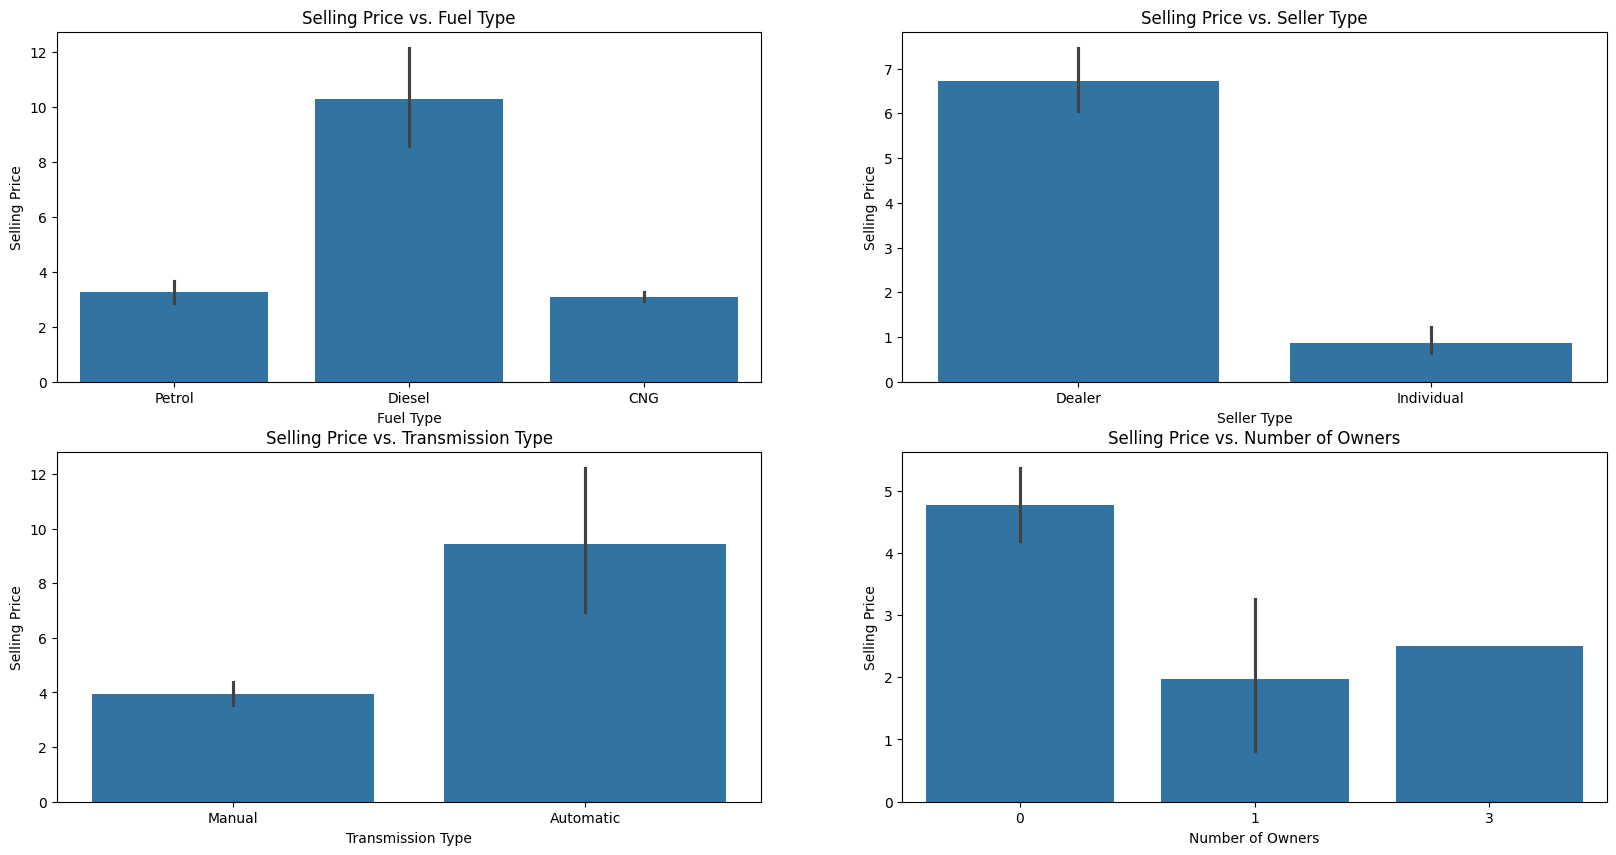

In [38]:
# Chart - 4 Barplot visualization code for categorical variable vs target variable
# Create a 2x2 subplot
plt.figure(figsize=(20,10))

# Subplot 1: Barplot for Selling_Price vs. Fuel_Type
plt.subplot(2,2,1)
sns.barplot(data=df, x='Fuel_Type', y='Selling_Price')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.title('Selling Price vs. Fuel Type')

# Subplot 2: Barplot for Selling_Price vs. Seller_Type
plt.subplot(2,2,2)
sns.barplot(data=df, x='Selling_type', y='Selling_Price')
plt.xlabel('Seller Type')
plt.ylabel('Selling Price')
plt.title('Selling Price vs. Seller Type')

# Subplot 3: Barplot for Selling_Price vs. Transmission
plt.subplot(2,2,3)
sns.barplot(data=df, x='Transmission', y='Selling_Price')
plt.xlabel('Transmission Type')
plt.ylabel('Selling Price')
plt.title('Selling Price vs. Transmission Type')

# Subplot 4: Barplot for Selling_Price vs. Owner
plt.subplot(2,2,4)
sns.barplot(data=df, x='Owner', y='Selling_Price')
plt.xlabel('Number of Owners')
plt.ylabel('Selling Price')
plt.title('Selling Price vs. Number of Owners')

# Display the plot
plt.show()

##### What is/are the insight(s) found from the chart?

From the above plots we can analyse that:

* The cars with 'Fuel_Type' Diesel has a higher 'Selling_Price' compared to the rest and at the same time cars running on Petrol and CNG are costs less and almost same.
* The cars sold by the 'Seller_Type' Dealers have a higher range whereas Individual sellers cost low.
* The cars with Automatic 'Transmission' costs more than the cars with Manual Transmission.
* First Owner cars holds a higher value in terms of 'Selling_Price' whereas we can also observe that the 'Selling_Price' reduces with an increase in the number of 'Owner'.

#### Chart - 5 : Driven Kilometers vs Selling Price

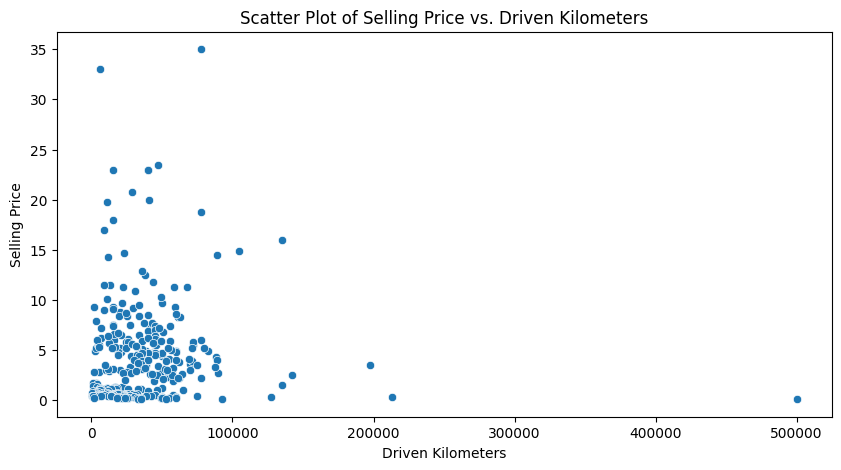

In [39]:
# Chart - 5 Scatter plot visualization code for Driven Kilometers vs Selling Price
# Set the figure size for the plot
plt.figure(figsize=(10,5))

# Create a scatter plot to visualize the relationship between Driven_kms and Selling_Price
sns.scatterplot(data=df, x='Driven_kms', y='Selling_Price')

# Set labels for the x and y axes
plt.xlabel('Driven Kilometers')
plt.ylabel('Selling Price')

# Add a title to the plot
plt.title('Scatter Plot of Selling Price vs. Driven Kilometers')

# Display the plot
plt.show()

##### What is/are the insight(s) found from the chart?

From the above Scatterplot, it can clearly seen that as the number of Driven Kilometers increases, the Selling Price of the car tends to decrease.

##### What is/are the insight(s) found from the chart?

From the above correlation heatmap we get to know that, Present price and selling price are positively highly correlated, as 'Present_Price' is likely one of the significant factors that influence the 'Selling_Price' of a car. And 'no_year' and 'Year' are negatively highly correlated.

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Outliers

In [41]:
# Handling Outliers & Outlier treatments
# Removing outliers by Using IQR method:
q1, q3, median = df.Selling_Price.quantile([0.25,0.75,0.5])
lower_limit = q1 - 1.5*(q3-q1)
upper_limit = q3 + 1.5*(q3-q1)
df['Selling_Price'] = np.where(df['Selling_Price'] > upper_limit, median,np.where(df['Selling_Price'] < lower_limit,median,df['Selling_Price']))

# Removing outliers by Capping:
for col in ['Present_Price','Driven_kms','Owner','no_year']:
  upper_limit = df[col].quantile(0.99)
  df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])

##### What all outlier treatment techniques have you used and why did you use those techniques?

Here i used IQR method and Capping method, Based on IQR method i set Upper limit and Lower limit of Selling Price and convert those outliers into median values.

Also i have capp outliers upto 99th percentile and above that i convert those outliers into upper limit value.

### 2. Categorical Encoding

In [42]:
# Before Categorical Encoding, Remove the 'Car Name' as it's no longer needed
df.drop(['Car_Name'], axis=1, inplace=True)

In [43]:
# Using one-hot encoding to convert categorical variables into numerical format
df = pd.get_dummies(df)

#### What all categorical encoding techniques have i used & why did i use those techniques?

One hot encoding is used to encode the categorical variables into numerical format.

### 3. Feature Manipulation & Selection

#### 1. Feature Manipulation

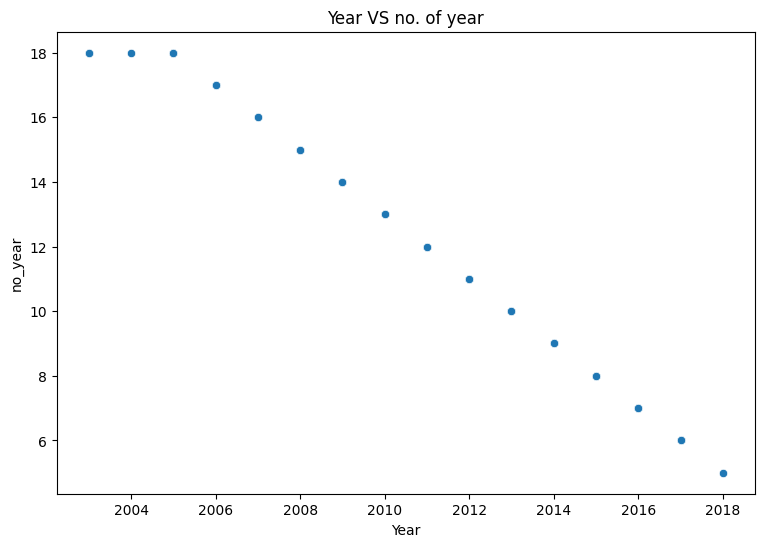

In [44]:
# Manipulate Features to minimize feature correlation and create new features

# We see that the Year and no_year are negatively highly correlated

# Plotting Scatter plot to visualize the relationship between
# Year and no_year
plt.figure(figsize=(9,6))
sns.scatterplot(x='Year',y='no_year',data=df)
plt.xlabel('Year')
plt.ylabel('no_year')
plt.title('Year VS no. of year')
plt.show()

In [45]:
# Correlation
df[['Year','no_year']].corr()

,Year,no_year
Year,1.000000,-0.998376
no_year,-0.998376,1.000000


In [46]:
# Removing 'Year' column as we've already calculated the age in the 'no_year' column
df.drop(['Year'], axis=1, inplace=True)

#### 2. Feature Selection

In [47]:
# Select your features wisely to avoid overfitting
features = [i for i in df.columns if i not in ['Selling_Price']]
features

['Present_Price',
 'Driven_kms',
 'Owner',
 'no_year',
 'Fuel_Type_CNG',
 'Fuel_Type_Diesel',
 'Fuel_Type_Petrol',
 'Selling_type_Dealer',
 'Selling_type_Individual',
 'Transmission_Automatic',
 'Transmission_Manual']

In [48]:
# Remove multicollinearity by using VIF technique
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [49]:
continuous_variables = ['Present_Price', 'Driven_kms', 'Owner', 'no_year']

In [50]:
continuous_feature_df = pd.DataFrame(df[continuous_variables])

In [51]:
continuous_feature_df

,Present_Price,Driven_kms,Owner,no_year
0,5.59,27000.0,0.0,9.0
1,9.54,43000.0,0.0,10.0
2,9.85,6900.0,0.0,6.0
3,4.15,5200.0,0.0,12.0
4,6.87,42450.0,0.0,9.0
...,...,...,...,...
296,11.60,33988.0,0.0,7.0
297,5.90,60000.0,0.0,8.0
298,11.00,87934.0,0.0,14.0
299,12.50,9000.0,0.0,6.0


In [52]:
calc_vif(df[[i for i in continuous_feature_df]])

,variables,VIF
0,Present_Price,2.153995
1,Driven_kms,4.818128
2,Owner,1.061741
3,no_year,4.530533


In [53]:
# This is the final data for modeling
df.head()

,Selling_Price,Present_Price,Driven_kms,Owner,no_year,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000.0,0.0,9.0,False,False,True,True,False,False,True
1,4.75,9.54,43000.0,0.0,10.0,False,True,False,True,False,False,True
2,7.25,9.85,6900.0,0.0,6.0,False,False,True,True,False,False,True
3,2.85,4.15,5200.0,0.0,12.0,False,False,True,True,False,False,True
4,4.60,6.87,42450.0,0.0,9.0,False,True,False,True,False,False,True


##### What all feature selection methods have i used  and why?

I have used pearson correlation coefficient to check correlation between variables and also with dependent variable.

And also i check the multicollinearity using VIF.

##### Which all features i found important and why?

From above methods i have found that there is negitively high correlation between Year and no_year. So, i take only 'no_year' variable and drop the 'Year' column, as we've already calculated the age in the 'no_year' column.

### 4. Data Transformation

#### Do i think that the data needs to be transformed? If yes, which transformation have i used. Explain Why?

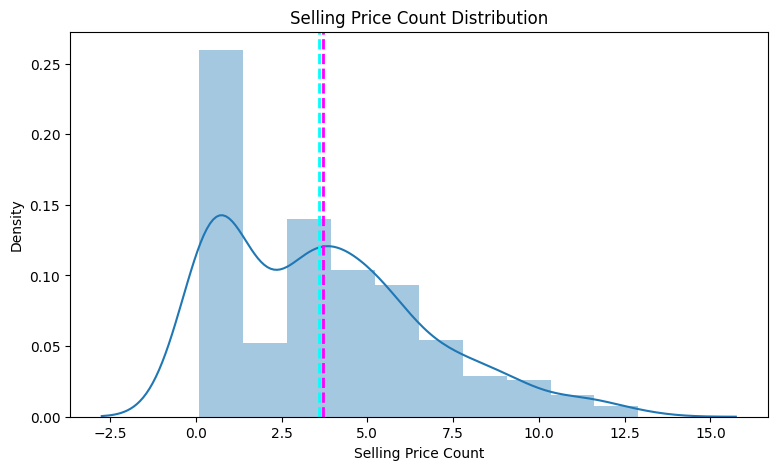

In [54]:
# Transform the data
# Visualizing the distribution of the dependent variable - Selling Price
plt.figure(figsize=(9,5))
sns.distplot(df[dependent_variable])
plt.xlabel('Selling Price Count')
plt.title('Selling Price Count Distribution')
plt.axvline(df[dependent_variable[0]].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df[dependent_variable[0]].median(), color='cyan', linestyle='dashed', linewidth=2)
plt.show()

In [55]:
# Skew of the dependent variable
df[dependent_variable].skew()

,0
Selling_Price,0.757016


In [57]:
# Skew of the dependent variable after log transformation
np.log1p(df[dependent_variable]).skew()

,0
Selling_Price,-0.222356


In [60]:
# Defining dependent and independent variables
X = df.drop('Selling_Price',axis=1)
y = np.log1p(df[dependent_variable])

In [61]:
features

['Present_Price',
 'Driven_kms',
 'Owner',
 'no_year',
 'Fuel_Type_CNG',
 'Fuel_Type_Diesel',
 'Fuel_Type_Petrol',
 'Selling_type_Dealer',
 'Selling_type_Individual',
 'Transmission_Automatic',
 'Transmission_Manual']

I have ploted distribution plot and also i did normality test and i have found that the data is not normally distributed, it needs transformation.

So, i have calculate the skewness value and i have found that the selling price attribute is positively skewed so i used log transformation & now the data looks normally distrubuted & skewness is also reduced.

### 5. Data Scaling

In [62]:
features = [i for i in df.columns if i not in ['Selling_Price']]

In [63]:
# Scaling your data
scaler = StandardScaler()
X = scaler.fit_transform(df[features])

##### Which method have i used to scale the data and why?

In this i have different independent features of different scale so i have used standard scalar method to scale our independent features into one scale.

### 6. Data Splitting

In [64]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [65]:
# Checking the train distribution of dependent variable
y_train.value_counts()

,count
Selling_Price,
1.526056,11
0.470004,6
0.371564,6
0.182322,5
1.609438,5
...,...
1.294727,1
1.266948,1
1.208960,1


## ***6. ML Model Implementation***

In [66]:
# Defining a function to print evaluation matrix
def evaluate_model(model, y_test, y_pred):

  '''takes model, y test and y pred values to print evaluation metrics, plot the actual and predicted values,
  plot the top 5 important features, and returns a list of the model scores'''

  # Apply inverse log transformation to y_test and y_pred as we have used log transformation
  y_t = np.exp(y_test)
  y_p = np.exp(y_pred)
  y_train2 = np.exp(y_train)
  y_train_pred = np.exp(model.predict(X_train))

  # Calculating Evaluation Matrix
  mse = mean_squared_error(y_t,y_p)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_t,y_p)
  r2_train = r2_score(y_train2, y_train_pred)
  r2 = r2_score(y_t,y_p)
  r2_adjusted = 1-(1-r2)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1))

  # Printing Evaluation Matrix
  print("MSE :" , mse)
  print("RMSE :" ,rmse)
  print("MAE :" ,mae)
  print("Train R2 :" ,r2_train)
  print("Test R2 :" ,r2)
  print("Adjusted R2 : ", r2_adjusted)


  # plot actual and predicted values
  plt.figure(figsize=(12,4))
  plt.plot((y_p)[:100])
  plt.plot((np.array(y_t)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.title('Actual and Predicted Selling Price', fontsize=12)

  try:
    importance = model.feature_importances_
  except:
    importance = model.coef_
  importance = np.absolute(importance)
  if len(importance)==len(features):
    pass
  else:
    importance = importance[0]

  # Feature importances
  feat = pd.Series(importance, index=features)
  plt.figure(figsize=(7,4))
  plt.title('Feature Importances (top 5) for '+str(model), fontsize = 12)
  plt.xlabel('Relative Importance')
  feat.nlargest(5).plot(kind='barh')


  model_score = [mse,rmse,mae,r2_train,r2,r2_adjusted]
  return model_score

In [ ]:
# Create a score dataframe
score = pd.DataFrame(index = ['MSE', 'RMSE', 'MAE', 'Train R2', 'Test R2', 'Adjusted R2'])

### ML Model - 1 : Linear Regression

In [ ]:
# Import the LinearRegression class
reg = LinearRegression()

# Fit the linear regression model to the training data
reg.fit(X_train, y_train)

# Predict on the model
y_pred_li = reg.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [132]:
# Updated Evaluation Metric Score chart
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = 0.01,Ridge,Ridge with alpha = 10,Decision tree,Decision tree tuned,Random forest,Random forest tuned,Gradient Boosting Regressor,Gradient Boosting Regressor Tuned,Extreme Gradient Boosting Regressor
MSE,4.169925,4.169925,9.807267,4.143092,4.160399,4.089084,0.808654,2.434226,0.570363,2.159855,0.782593,0.966086,0.913753
RMSE,2.042039,2.042039,3.131656,2.035459,2.039706,2.022148,0.899252,1.560201,0.755224,1.469644,0.884643,0.982897,0.955904
MAE,1.289149,1.289149,2.513358,1.297225,1.288941,1.291700,0.589780,1.080127,0.496435,1.010518,0.544234,0.629160,0.572901
Train R2,0.642142,0.642142,-0.100592,0.636293,0.641916,0.639257,1.000000,0.760030,0.986129,0.771048,0.987840,0.961141,0.999985
Test R2,0.492442,0.492442,-0.193729,0.495708,0.493601,0.502282,0.901572,0.703709,0.930576,0.737105,0.904744,0.882409,0.888779
Adjusted R2,0.421769,0.421769,-0.359944,0.425490,0.423090,0.432979,0.887866,0.662453,0.920909,0.700499,0.891480,0.866036,0.873293


#### 2. Cross- Validation & Hyperparameter Tuning

In [133]:
# Define the model
reg = LinearRegression()

# Define the parameters to be optimized
param_grid = {'fit_intercept': [True, False]}

# Perform grid search
grid_search = GridSearchCV(reg, param_grid, cv=5, scoring='r2', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]},
             return_train_score=True, scoring='r2')

In [72]:
# Print the best parameters and the corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best R2 score: ", grid_search.best_score_)

Best parameters:  {'fit_intercept': True}
Best R2 score:  0.8058936696873664


In [73]:
# Use the best parameter to train the model
best_reg = grid_search.best_estimator_
best_reg.fit(X_train, y_train)

LinearRegression()

In [74]:
# Predict on test data
y_pred_li2 = best_reg.predict(X_test)

MSE : 4.169924716556089
RMSE : 2.0420393523524685
MAE : 1.2891485919279801
Train R2 : 0.6421421951879258
Test R2 : 0.4924417983344852
Adjusted R2 :  0.4217691373430844


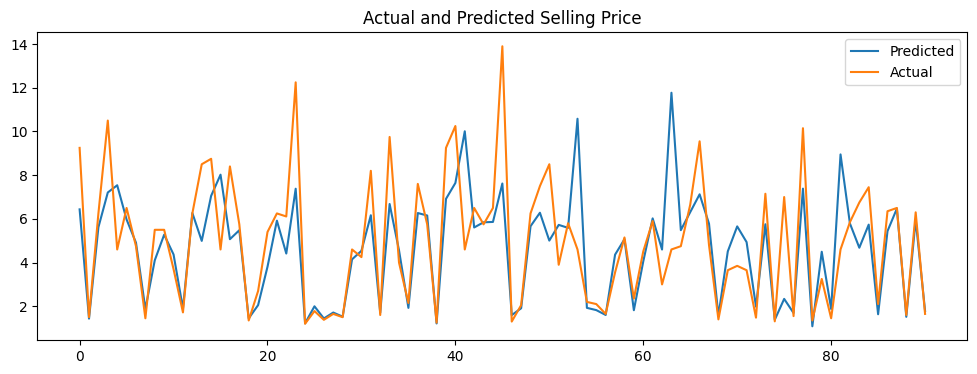

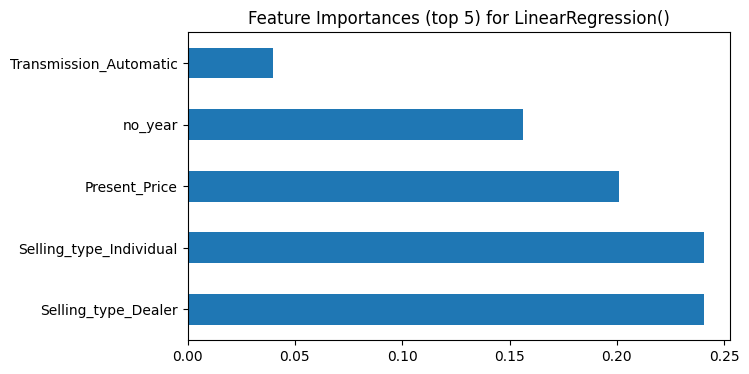

In [75]:
# Visualizing evaluation Metric Score chart
linear_score2 = evaluate_model(best_reg, y_test,y_pred_li2)

In [76]:
# Updated Evaluation Metric Score chart
score['Linear regression tuned'] = linear_score2
score

,Linear regression,Linear regression tuned
MSE,4.169925,4.169925
RMSE,2.042039,2.042039
MAE,1.289149,1.289149
Train R2,0.642142,0.642142
Test R2,0.492442,0.492442
Adjusted R2,0.421769,0.421769


### ML Model - 7 : Extreme Gradient Boosting Regressor

In [126]:
# Import Extreme Gradient Boosting Regressor class
xgb_model = xgb.XGBRegressor(random_state=0,
                             objective='reg:squarederror')

# Fit the Extreme Gradient Boosting model to the training data
xgb_model.fit(X_train,y_train)

# Predict on the model
y_pred_xgb1 = xgb_model.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

MSE : 0.9137531518936157
RMSE : 0.955904363361532
MAE : 0.5729007720947266
Train R2 : 0.9999845027923584
Test R2 : 0.8887791037559509
Adjusted R2 :  0.8732926498485517


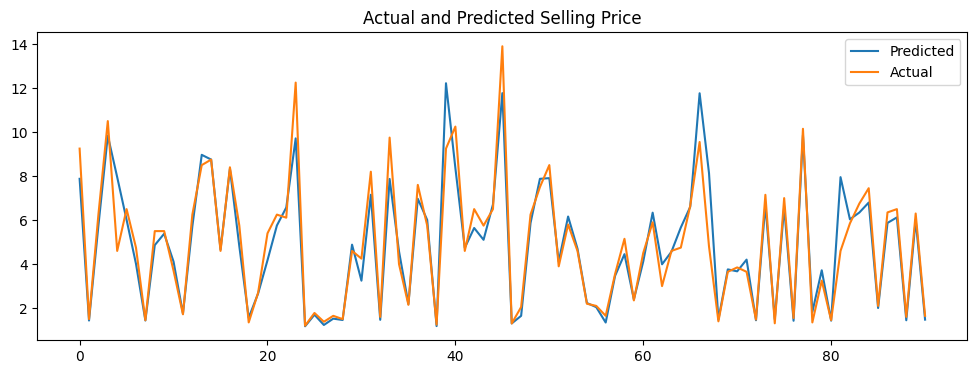

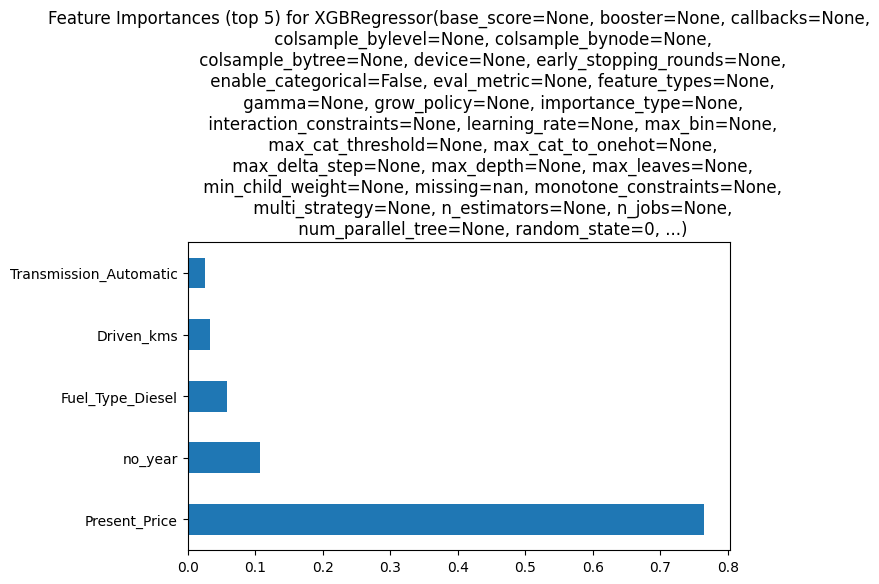

In [127]:
# Visualizing evaluation Metric Score chart
result = evaluate_model(xgb_model, y_test,y_pred_xgb1)
score['Extreme Gradient Boosting Regressor'] = result

In [128]:
# Updated Evaluation Metric Score chart
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = 0.01,Ridge,Ridge with alpha = 10,Decision tree,Decision tree tuned,Random forest,Random forest tuned,Gradient Boosting Regressor,Gradient Boosting Regressor Tuned,Extreme Gradient Boosting Regressor
MSE,4.169925,4.169925,9.807267,4.143092,4.160399,4.089084,0.808654,2.434226,0.570363,2.159855,0.782593,0.966086,0.913753
RMSE,2.042039,2.042039,3.131656,2.035459,2.039706,2.022148,0.899252,1.560201,0.755224,1.469644,0.884643,0.982897,0.955904
MAE,1.289149,1.289149,2.513358,1.297225,1.288941,1.291700,0.589780,1.080127,0.496435,1.010518,0.544234,0.629160,0.572901
Train R2,0.642142,0.642142,-0.100592,0.636293,0.641916,0.639257,1.000000,0.760030,0.986129,0.771048,0.987840,0.961141,0.999985
Test R2,0.492442,0.492442,-0.193729,0.495708,0.493601,0.502282,0.901572,0.703709,0.930576,0.737105,0.904744,0.882409,0.888779
Adjusted R2,0.421769,0.421769,-0.359944,0.425490,0.423090,0.432979,0.887866,0.662453,0.920909,0.700499,0.891480,0.866036,0.873293


Using Extreme Gradient Boosting Regressor i have got accuracy around 99% and 88% on train and test data respectively. It is overfitting the model's training accuracy is almost 100%.

So, lets tune it.

#### 2. Cross- Validation & Hyperparameter Tuning

In [136]:
import pickle
# Save the model to a pickle file
with open("random_forest_regression_model.pkl", "wb") as f:
  pickle.dump(rf, f)

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [137]:
# Load the model from the pickle file
with open("random_forest_regression_model.pkl", "rb") as f:
    loaded_rf_model = pickle.load(f)

new_test_preds = loaded_rf_model.predict(X_test)

# Sanity Check
mse = mean_squared_error(y_test, new_test_preds)
mae = mean_absolute_error(y_test, new_test_preds)
r2 = r2_score(y_test, new_test_preds)
print("MSE:", mse)
print("MAE:", mae)
print("R2 Score:", r2)

MSE: 0.018975515884822016
MAE: 0.09665869090137903
R2 Score: 0.9580905257703131


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **Conclusion**

This project explores the automotive industry's intricate dynamics, aiming to predict car prices with machine learning. By analyzing various factors such as fuel type, seller type, and transmission, we uncover valuable insights and select a robust model for accurate price prediction.

**Key Insights:**

- The 'city' model is the top-selling car, followed by 'corolla altis,' 'verna,' 'fortuner,' and 'brio,' providing a snapshot of popular car models in the market.

- The year 2015 saw the highest number of car purchases, making it the most favored year for buying cars, followed by 2016 and 2014.

- 'Petrol' is the predominant fuel type for cars in the dataset, surpassing 'Diesel' and 'CNG,' indicating fuel preference among buyers.

- The majority of cars are sold through dealers, underscoring the role of dealerships in the automotive market.

- 'Manual' transmission cars significantly outnumber 'Automatic' transmission cars, showcasing consumer transmission preferences.

- 'First Owner' cars generally command higher 'Selling_Price,' while 'Second' or 'Third Owner' cars often have lower prices.

- 'Diesel' cars tend to have higher 'Selling_Price' compared to 'Petrol' or 'CNG' vehicles, emphasizing the influence of fuel type on car pricing.

- 'Dealer' sellers usually ask for higher prices than 'Individual' sellers, revealing the impact of seller type on prices.

- 'Automatic' transmission cars typically have higher prices than their 'Manual' counterparts, reflecting consumer preferences.

- 'Owner' count plays a role in car pricing, with 'First Owner' cars being more expensive than 'Second' or 'Third Owner' cars.

- The relationship between driven kilometers and 'Selling_Price' is negative, suggesting that cars with fewer kilometers tend to have higher selling prices.

- Various machine learning models were assessed, with the Random Forest model being chosen for car price prediction due to its robust performance.

- The project used the R2 score as the primary evaluation metric to assess model accuracy.

- The Random Forest model achieved impressive accuracy with 98% training accuracy and 93% testing accuracy, making it a suitable choice for car price prediction.

The insights provide a holistic understanding of the factors influencing car prices, both from exploratory data analysis and machine learning model perspectives. The Random Forest model's accuracy underscores its potential for practical applications in the automotive market.

This project has not only equipped us with valuable data science skills but has also deepened our understanding of car pricing, making it a significant step in the field of data science and machine learning.